# <font color='#FFE15D'>**Week 11: Logistic Regression 🔴🔵**</font>

## **🔸 Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **🔸 Load Dataset**

In [2]:
import os

notebook_path = os.getcwd()
housing_dataset_csv_path = f"{notebook_path}/data/exam.csv"
df = pd.read_csv(housing_dataset_csv_path)
df

,study_hours,pass_fail
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


## **🔸 Train-Test Split**

In [3]:
from sklearn.model_selection import train_test_split

#TODO Do it with normalization, two method

In [4]:
X = df[["study_hours"]].values
y = df[["pass_fail"]].values
X, y

(array([[0.5 ],
        [0.75],
        [1.  ],
        [1.25],
        [1.5 ],
        [1.75],
        [1.75],
        [2.  ],
        [2.25],
        [2.5 ],
        [2.75],
        [3.  ],
        [3.25],
        [3.5 ],
        [4.  ],
        [4.25],
        [4.5 ],
        [4.75],
        [5.  ],
        [5.5 ]]),
 array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=int64))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16, 1), (4, 1), (16, 1), (4, 1))

## **🔸 Logistic Regression (from Scratch)**

### Logistic Regression Model

$\hat{y}=\sigma(x)=\frac{1}{1+e^{-Xw}}$

In [6]:
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))
sigmoid = lambda x: 1 / (1 + np.exp(-x))

In [7]:
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

In [8]:
# Test functions
x = np.random.randn(5, 2)
w = np.random.randn(2, 1)
y_hat = logistic_regression(x, w)
print(f"x: {x.shape} \n{x}")
print(f"w: {w.shape} \n{w}")
print(f"y_hat: {y_hat.shape} \n{y_hat}")

x: (5, 2) 
[[-1.33970465 -2.39967542]
 [-1.14227438  1.06899725]
 [-1.17020537  0.5787941 ]
 [-0.39815067  1.57765818]
 [-1.05140489  0.22727112]]
w: (2, 1) 
[[0.96969822]
 [0.16840149]]
y_hat: (5, 1) 
[[0.15404543]
 [0.28340361]
 [0.26167588]
 [0.46993481]
 [0.27263933]]


### Binary Cross Entropy (BCE)

$L=-[ylog(\hat{y})+(1-y)log(1-\hat{y})]$

In [9]:
def bce(y, y_hat):
    # loss = -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

In [10]:
# Test functions
bce(np.ones((5, 1)), y_hat)

1.3053612713569378

### Gradient

$\nabla L_w(w)=\frac{1}{n}X^T(\hat{y}-y)$

In [11]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

In [12]:
# Test functions
gradient(np.random.randn(5, 2), np.ones((5, 1)), y_hat)

array([[-0.18650798],
       [-0.25276888]])

### Gradient Descent

In [13]:
def gradient_descent(w, eta, grads):
    w -= eta * grads
    return w

### Accuracy

In [14]:
def accuracy(y, y_hat):
    # acc = np.sum(y == np.round(y_hat)) / len(y)
    thr = 0.5
    # thr = 0.4
    # thr = 0.9
    acc = np.sum(y == (y_hat > thr).astype(int)) / len(y)
    return acc

In [15]:
accuracy(np.array([1, 0, 1]), np.array([0.7, 0.5, 0.3]))

0.6666666666666666

### Train

In [16]:
print(f"before add 1, x_train: {x_train.shape}")
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
print(f"after add  1, x_train: {x_train.shape}")

before add 1, x_train: (16, 1)
after add  1, x_train: (16, 2)


In [17]:
m = 1
w = np.random.randn(m + 1, 1)
print(f"w: {w.shape}\n{w}")

eta = 0.1
n_epochs = 2000

w: (2, 1)
[[-0.02871228]
 [ 0.01529829]]


In [18]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(x_train, w)

    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(x_train, y_train, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch={epoch},\t E={e:.4},\t w={w.T[0]}")

Epoch=99,	 E=0.4246,	 w=[-1.40821004  0.60171879]
Epoch=199,	 E=0.3332,	 w=[-2.31280476  0.88341019]
Epoch=299,	 E=0.2868,	 w=[-2.95816494  1.08881611]
Epoch=399,	 E=0.2591,	 w=[-3.45710044  1.24987804]
Epoch=499,	 E=0.2408,	 w=[-3.86348043  1.3824164 ]
Epoch=599,	 E=0.2277,	 w=[-4.20643032  1.49515777]
Epoch=699,	 E=0.2178,	 w=[-4.5032965  1.5933707]
Epoch=799,	 E=0.2102,	 w=[-4.76519156  1.68046588]
Epoch=899,	 E=0.2041,	 w=[-4.999644    1.75877399]
Epoch=999,	 E=0.1991,	 w=[-5.21198329  1.82995723]
Epoch=1099,	 E=0.1949,	 w=[-5.40611768  1.89524255]
Epoch=1199,	 E=0.1913,	 w=[-5.58499733  1.95556154]
Epoch=1299,	 E=0.1882,	 w=[-5.75090349  2.01163841]
Epoch=1399,	 E=0.1855,	 w=[-5.90563647  2.06404744]
Epoch=1499,	 E=0.1832,	 w=[-6.05064204  2.1132519 ]
Epoch=1599,	 E=0.1811,	 w=[-6.18709892  2.15963098]
Epoch=1699,	 E=0.1793,	 w=[-6.31598087  2.20349917]
Epoch=1799,	 E=0.1776,	 w=[-6.4381017   2.24512019]
Epoch=1899,	 E=0.1761,	 w=[-6.55414863  2.28471748]
Epoch=1999,	 E=0.1747,	 w

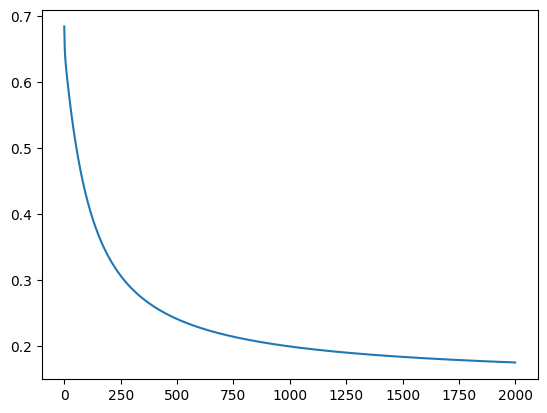

In [19]:
plt.plot(error_hist)

### Test

In [20]:
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
x_test.shape

(4, 2)

In [21]:
y_hat = logistic_regression(x_test, w)
accuracy(y_test, y_hat)

0.25

In [22]:
y_hat,y_test

(array([[0.81214062],
        [0.06911501],
        [0.96105351],
        [0.19168123]]),
 array([[0],
        [1],
        [1],
        [1]], dtype=int64))